<h1> First homework assignment</h1>
<h2>Statistical data analysis course - University of Warsaw</h2>

#### Joanna Kęczkowska

Data set laptops.csv contains:
- inches
- weight
- price_euros
- company – (1 – Acer, 2 – Asus, 3 – Dell, 4 – HP, 5 – Lenovo, 6 – MSI, 7 – Toshiba)
- typename – (1 – 2w1, 2 – gaming, 3 – netbook, 4 – notebook, 5 – ultrabook, 6 – stacja robocza)
- ram – (1 – 4GB, 2 – 8GB, 3 – 16GB, 4 – 32GB)

<h2> Importing data <h2>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from scipy.stats import f
from scipy.stats import chi2_contingency 
from scipy.stats import ttest_ind 
from scipy.stats import levene 
from scipy.stats import variation
from scipy.stats import t as student
import matplotlib.pyplot as plt
import seaborn as sns

dataSet = pd.read_csv('laptops.csv', sep=";")
dataSet.describe()

,inches,weight,price_euros,company,typename,ram
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,15.077321,2.069405,1128.914991,3.710158,3.539405,1.873905
std,1.385856,0.660224,664.678267,1.489391,1.255218,0.715328
min,10.100000,0.690000,209.000000,1.000000,1.000000,1.000000
25%,14.000000,1.600000,619.612503,3.000000,2.000000,1.000000
50%,15.600000,2.060000,986.500000,4.000000,4.000000,2.000000
75%,15.600000,2.330000,1485.827515,5.000000,4.000000,2.000000
max,18.400000,4.700000,4899.000000,7.000000,6.000000,4.000000


In [2]:
dataSet.head()

,inches,weight,price_euros,company,typename,ram
0,15.6,1.86,575.000000,4,4,2
1,15.6,2.10,400.000000,1,4,1
2,14.0,1.30,1495.000000,2,5,3
3,14.0,1.60,770.000000,1,5,2
4,15.6,1.86,393.899994,4,4,1


In [3]:
dataSet.dtypes

inches         float64
weight         float64
price_euros    float64
company          int64
typename         int64
ram              int64
dtype: object

<h2>Verify following hypothiesis:<h2>

<h3>a) The amount of RAM used in a laptop depends on its manufacturer.<h3>

**Chi-square test** is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.  

Expected value for a single cell: $e = \frac{row.sum*col.sum}{grand.total}$  
Chi-square statistic: ${\chi}^2 = \sum \frac{(o-e)^2}{e}$, where **o** - observed, **e** - expected

Null hypothesis $H_0$: The amount of RAM used in laptop is **independent** of its manufacturer.  
Alternative hypothesis $H_1$: The amount of RAM used in a laptop **depends** on its manufacturer.  

In [4]:
memory = dataSet["ram"]
company = dataSet["company"] 

In [5]:
TAB = pd.crosstab(company, memory, margins=True)
type(TAB)
TAB

ram,1,2,3,4,All
company,,,,,
1,57,33,4,0,94
2,45,61,35,3,144
3,63,161,54,7,285
4,90,142,13,0,245
5,89,141,39,3,272
6,0,22,31,1,54
7,14,25,8,1,48
All,358,585,184,15,1142


In [6]:

TOTAL = int(TAB.values[7:8, 4:5])

expected = np.asarray([TAB.values[7:8,0:4][0]*int(TAB.values[i-1:i,4:5])/TOTAL for i in np.arange(1,8)])

In [7]:
expected

array([[ 29.4676007 ,  48.15236427,  15.14535902,   1.23467601],
       [ 45.14185639,  73.76532399,  23.20140105,   1.89141856],
       [ 89.34325744, 145.9938704 ,  45.91943958,   3.74343257],
       [ 76.80385289, 125.50350263,  39.47460595,   3.21803853],
       [ 85.26795096, 139.33450088,  43.82486865,   3.57267951],
       [ 16.92819615,  27.6619965 ,   8.70052539,   0.70928196],
       [ 15.04728546,  24.58844133,   7.73380035,   0.63047285]])

In [8]:
observed=np.asarray(TAB.values[0:7,0:4])
type(observed)==type(expected)

True

In [9]:
#test statistic
chi_sq = np.sum(np.square(np.subtract(observed, expected))/expected)
chi_sq

164.23407357615477

In [10]:
alpha = 0.05
degFreed = (observed.shape[0]-1)*(observed.shape[1]-1) #degrees of freedom
pval = 1-chi2.cdf(chi_sq, degFreed) #right-tailed
quantile = chi2.ppf(1-alpha, degFreed)

degFreed

18

In [11]:
pval

0.0

In [12]:
pval > alpha

False

In [13]:
quantile

28.869299430392623

In [14]:
if(pval<alpha):
    print("Reject the null hypothesis H0 in favor of the alternative hypothesis")
else:
    print("There is insufficient evidence")

Reject the null hypothesis H0 in favor of the alternative hypothesis


In [15]:
#built-in function
chi2_contingency(observed)

(164.23407357615477,
 1.2327384246498041e-25,
 18,
 array([[ 29.4676007 ,  48.15236427,  15.14535902,   1.23467601],
        [ 45.14185639,  73.76532399,  23.20140105,   1.89141856],
        [ 89.34325744, 145.9938704 ,  45.91943958,   3.74343257],
        [ 76.80385289, 125.50350263,  39.47460595,   3.21803853],
        [ 85.26795096, 139.33450088,  43.82486865,   3.57267951],
        [ 16.92819615,  27.6619965 ,   8.70052539,   0.70928196],
        [ 15.04728546,  24.58844133,   7.73380035,   0.63047285]]))

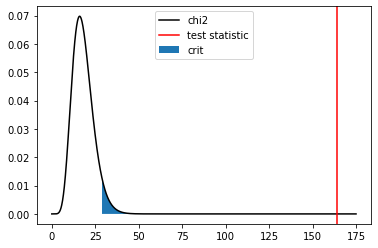

In [16]:
fig, ax = plt.subplots()
ar = np.arange(0, 175, 0.1)
ax.plot(ar, chi2.pdf(ar, degFreed), color='black', label='chi2')
section = np.arange(quantile, 175, 0.1)
ax.axvline(x=chi_sq, color='red', label='test statistic')
ax.fill_between(section, chi2.pdf(section, degFreed), label='crit')
ax.legend()

**The amount of RAM used in a laptop depends on its manufacturer**   
test statistic value is not in range of confidence interval $(-\infty, 25.98942308263721)$  
p-value is less than fixed significance level $\alpha = 0.1$.

<h3>b) RAM distribution in HP and Lenovo notebooks is the same.<h3>

Same test as above - comaping distributions.

Null hypothesis $H_0$: Significantly different distributions.  
Alternative hypothesis $H_1$: Same distributions. 

In [18]:
dataSet = dataSet.loc[dataSet["typename"]==4]
LenovoRAM = pd.DataFrame(dataSet.loc[dataSet["company"]==5,"ram"])
HPRAM = pd.DataFrame(dataSet.loc[dataSet["company"]==4,"ram"])

In [19]:
n = len(LenovoRAM)
m = len(HPRAM)

print(n)
print(m)

158
163


In [20]:
LenovoRAM.value_counts()

ram
2      78
1      73
3       6
4       1
dtype: int64

In [21]:
HPRAM.value_counts()

ram
2      83
1      76
3       4
dtype: int64

In [22]:
counts1 = LenovoRAM.value_counts().values
counts1 = pd.DataFrame(counts1)

counts2 = HPRAM.value_counts().values
counts2 = pd.DataFrame(counts2)

counts1["hp"] = counts2
counts = counts1.rename(columns={0: "lenovo"})
counts.at[3,"hp"]=0

In [23]:
counts

,lenovo,hp
0,78,83.0
1,73,76.0
2,6,4.0
3,1,0.0


In [24]:
observed = counts

In [25]:
test, pval, degFreed, expected = chi2_contingency(observed)
quantile = chi2.ppf(1-alpha, degFreed)

In [26]:
test

1.538173762324661

In [27]:
if(pval<alpha):
    print("Reject the null hypothesis H0 in favor of the alternative hypothesis")
else:
    print("There is insufficient evidence")

There is insufficient evidence


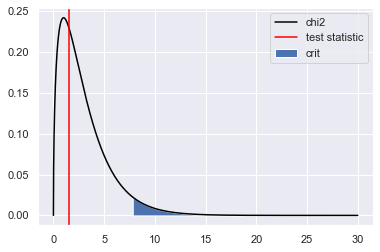

In [28]:
fig, ax = plt.subplots()
ar = np.arange(0, 30, 0.01)
ax.plot(ar, chi2.pdf(ar, degFreed), color='black', label='chi2')
section = np.arange(quantile, 30, 0.01)
ax.axvline(x=test, color='red', label='test statistic')
ax.fill_between(section, chi2.pdf(section, degFreed), label='crit')
ax.legend()

**We can't reject null hypothesis**
test statistic value is in range of confidence interval $(-\infty, 7.814727903251179)$  
p-value is greater than fixed significance level $\alpha = 0.05$.

<h3>c) The average log prices of a Dell and HP notebook are equal.<h3>

**Independent two-sample t-test** compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.  

$t = \frac{\overline{X}-\overline{Y}}{\sqrt{\frac{s_X^2}{n_X}+\frac{s_Y^2}{n_Y}}}$,  
where $\overline{X}$, $\overline{Y}$ - means, $s_X^2$, $s_Y^2$ - unbiased variance estimators, $n_X$, $n_Y$ - sample sizes

Null hypothesis $H_0$: The average log prices of a Dell and HP notebook are equal.  
Alternative hypothesis $H_1$: The average log prices of a Dell and HP notebook are **not** equal.

In [29]:
dellPrices = np.asarray(dataSet.loc[dataSet["company"]==3,"price_euros"])
hpPrices = np.asarray(dataSet.loc[dataSet["company"]==4,"price_euros"])

In [30]:
logDellPrices = np.log(dellPrices)
logHpPrices = np.log(hpPrices)

n = len(dellPrices)
m = len(hpPrices)

variation(logDellPrices) != variation(logHpPrices)

True

**Q–Q (quantile-quantile) plot** is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. Before running two-sample t-test we need to check if variables are normally distributed.

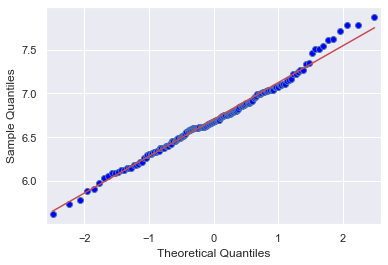

In [31]:
import statsmodels.api as sm

sm.qqplot(logDellPrices, line="s")
plt.show()

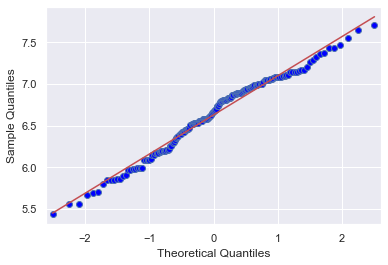

In [32]:
sm.qqplot(logHpPrices, line="s")
plt.show()

The Q–Q plots follow the 45° line, so variables are normally distributed.

In [33]:
#unbiased variance estimators
unbiased_est1 = 1/(n-1)*np.sum(np.square(logDellPrices-[np.mean(logDellPrices)]*n)) 
unbiased_est2 = 1/(m-1)*np.sum(np.square(logHpPrices-[np.mean(logHpPrices)]*m)) 

In [34]:
a = unbiased_est1/n+unbiased_est2/m
t = (np.mean(logDellPrices)-np.mean(logHpPrices))/np.sqrt(a) 
t #test statistic

1.481162120009298

In [35]:
#two-tailed
pval = student.sf(t, n+m-2)*2
pval

0.13955663935505425

In [36]:
lowerBound = student.ppf(alpha, n+m-2)
upperBound = student.ppf(1-alpha, n+m-2)
print(f"confidence interval = ({lowerBound}, {upperBound})")

confidence interval = (-1.6496746335097259, 1.6496746335097252)


In [37]:
if(pval<alpha):
    print("Reject the null hypothesis H0 in favor of the alternative hypothesis")
else:
    print("There is insufficient evidence")

There is insufficient evidence


In [38]:
#built-in function
ttest_ind(logDellPrices, logHpPrices)

Ttest_indResult(statistic=1.4775874946455057, pvalue=0.14051103793597833)

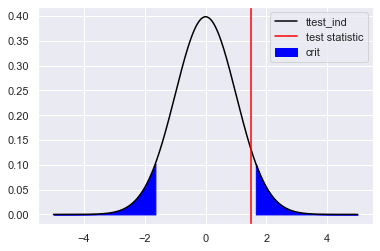

In [39]:
fig, ax = plt.subplots()
ar = np.arange(-5, 5, 0.01)
ax.plot(ar, student.pdf(ar, n+m-2), color='black', label='ttest_ind')
section1 = np.arange(upperBound, 5, 0.01)
section2 = np.arange(-5, lowerBound, 0.01)
ax.axvline(x=t, color='red', label='test statistic')
ax.fill_between(section1, student.pdf(section1, n+m-2), label='crit', color='blue')
ax.fill_between(section2, student.pdf(section2, n+m-2), color='blue')
ax.legend()

**We can't reject null hipothesis**